# Data Cleaning Project — AB_NYC_2019.csv

Objective: Demonstrate robust data cleaning techniques to ensure quality, reliable analysis.

In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("AB_NYC_2019.csv")

# Basic inspection
print(f"Shape: {df.shape}")
df.info()
df.head(3)


Shape: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review  

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [2]:
# Check for Missing Value

# Missing value summary
missing_summary = df.isnull().sum()
missing_percent = (missing_summary / len(df)) * 100
missing_df = pd.DataFrame({
    "Missing Count": missing_summary,
    "Missing %": missing_percent
}).sort_values(by="Missing %", ascending=False)

missing_df


,Missing Count,Missing %
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


In [3]:
# Handle Missing Data

# Strategy sed by me:
# - Drop rows with missing `name` or `host_name` (not useful without identity)
# - Fill `reviews_per_month` with 0 (makes sense if no reviews)
# - Drop rows where `last_review` is missing but number_of_reviews > 0 is expected

df.dropna(subset=["name", "host_name"], inplace=True)
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

# Optional: fill `last_review` for 0 reviews (can be misleading, so drop instead)
df.drop(columns=["last_review"], inplace=True)


In [4]:
# Check for exact duplicates
duplicates = df.duplicated()
print(f"Duplicate Rows: {duplicates.sum()}")

# Drop them
df = df[~duplicates]


Duplicate Rows: 0


In [5]:
# Standardize and Clean Data

# Normalize string columns: trim whitespace and lowercase where needed
df["neighbourhood"] = df["neighbourhood"].str.strip().str.title()
df["room_type"] = df["room_type"].str.strip().str.title()

# Fix invalid values: Negative prices or extremely high prices
df = df[df["price"] > 0]
df = df[df["price"] < df["price"].quantile(0.99)]  # keep below 99th percentile

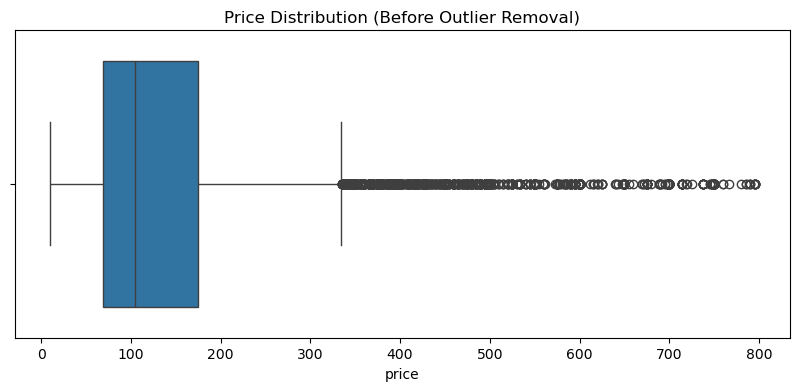

In [6]:
# Outlier Detection & Treatment

import seaborn as sns
import matplotlib.pyplot as plt

# Visual inspection of price outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["price"])
plt.title("Price Distribution (Before Outlier Removal)")
plt.show()

# Already handled price above (removed top 1%)


In [7]:
#  Ensure Data Integrity

# Check if host_id and host_name mapping is consistent
host_check = df.groupby("host_id")["host_name"].nunique()
print("Inconsistent Host IDs:", (host_check > 1).sum())

# Logical check: availability should be between 0 and 365
df = df[(df["availability_365"] >= 0) & (df["availability_365"] <= 365)]

# Minimum nights threshold
df = df[df["minimum_nights"] <= 365]  # remove extreme cases


Inconsistent Host IDs: 0


In [8]:
# Final Summary & Export Cleaned Data

print("Final shape:", df.shape)
df.describe(include="all")

# Export to a new CSV
df.to_csv("AB_NYC_2019_cleaned.csv", index=False)
print("✅ Cleaned data exported as 'AB_NYC_2019_cleaned.csv'")


Final shape: (48342, 15)
✅ Cleaned data exported as 'AB_NYC_2019_cleaned.csv'
